# 신경망 모델 훈련

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
def model_fun(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [6]:
model = model_fun()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
# verbose -> 기본값은 1 / 2로하면 진행막대를 빼고 출력 / 0으로 지정하면 훈련과정을 나타내지 않음
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [10]:
history.history

{'accuracy': [0.8118958473205566,
  0.8557708263397217,
  0.8694375157356262,
  0.8796250224113464,
  0.8849583268165588],
 'loss': [0.5311834216117859,
  0.3947155773639679,
  0.3589134216308594,
  0.3360195457935333,
  0.3160899579524994]}

In [8]:
# history - 훈련 측정값 담겨 있음
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


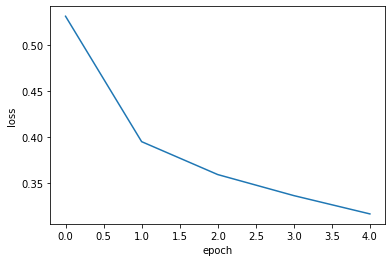

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

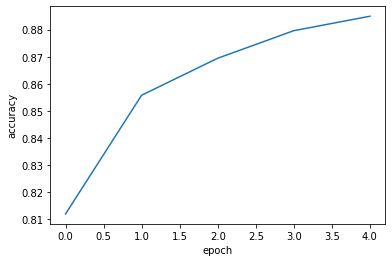

In [12]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

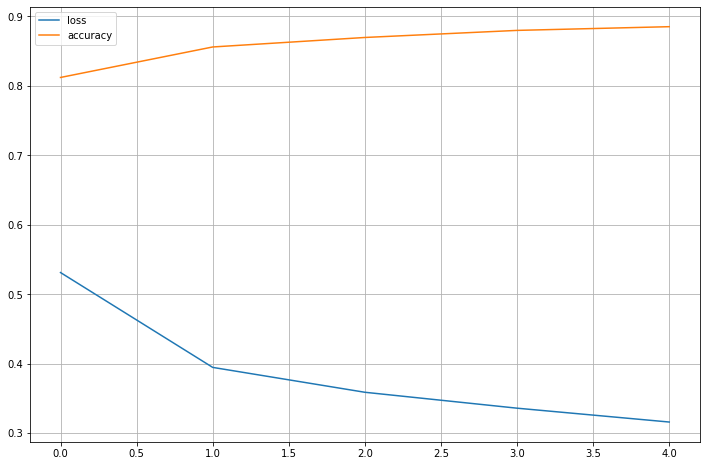

In [14]:
plot_target = ["loss","accuracy"]

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(history.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [17]:
model = model_fun()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=2)

Epoch 1/20
1500/1500 - 3s - loss: 0.5307 - accuracy: 0.8120 - 3s/epoch - 2ms/step
Epoch 2/20
1500/1500 - 3s - loss: 0.3942 - accuracy: 0.8580 - 3s/epoch - 2ms/step
Epoch 3/20
1500/1500 - 3s - loss: 0.3541 - accuracy: 0.8722 - 3s/epoch - 2ms/step
Epoch 4/20
1500/1500 - 3s - loss: 0.3308 - accuracy: 0.8820 - 3s/epoch - 2ms/step
Epoch 5/20
1500/1500 - 3s - loss: 0.3152 - accuracy: 0.8873 - 3s/epoch - 2ms/step
Epoch 6/20
1500/1500 - 3s - loss: 0.3084 - accuracy: 0.8910 - 3s/epoch - 2ms/step
Epoch 7/20
1500/1500 - 3s - loss: 0.2956 - accuracy: 0.8955 - 3s/epoch - 2ms/step
Epoch 8/20
1500/1500 - 3s - loss: 0.2897 - accuracy: 0.8970 - 3s/epoch - 2ms/step
Epoch 9/20
1500/1500 - 3s - loss: 0.2819 - accuracy: 0.9014 - 3s/epoch - 2ms/step
Epoch 10/20
1500/1500 - 3s - loss: 0.2755 - accuracy: 0.9047 - 3s/epoch - 2ms/step
Epoch 11/20
1500/1500 - 3s - loss: 0.2689 - accuracy: 0.9063 - 3s/epoch - 2ms/step
Epoch 12/20
1500/1500 - 3s - loss: 0.2647 - accuracy: 0.9079 - 3s/epoch - 2ms/step
Epoch 13/20
1

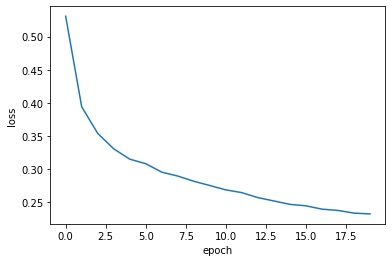

In [18]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실
- 과소적합과 과대적합을 확인하기 위해 검증 손실 확인

In [19]:
model = model_fun()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


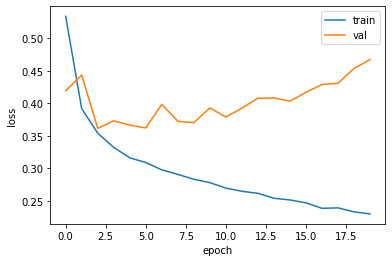

In [20]:
# 5번째 epoch부터 다시 loss값이 상승 -> 과대적합 모델
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

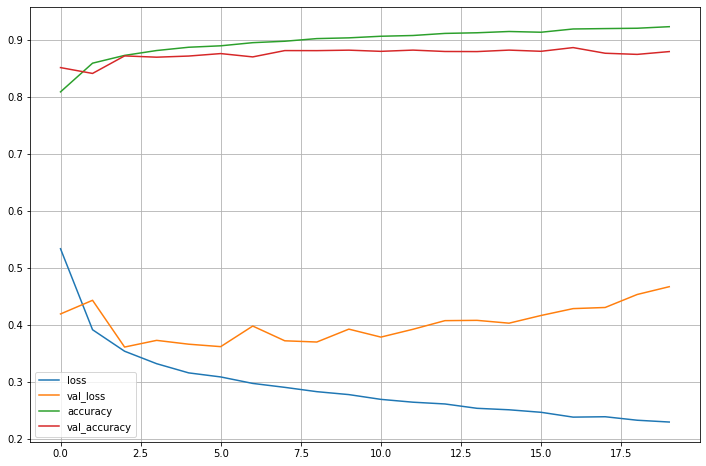

In [23]:
plot_target = ["loss","val_loss","accuracy","val_accuracy"]

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(history.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [24]:
# 기본이누RMSprop대신 adam을 사용하여 모델학습
model = model_fun()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

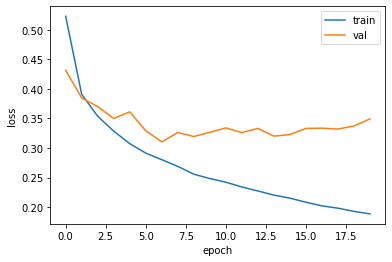

In [26]:
# 대략 5번쨰 epoch 이후로도 다시 감소하는 형태 보임 그러나 여전히 요동이 남음
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃
- 과대적합을 막을 수 있음

In [27]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

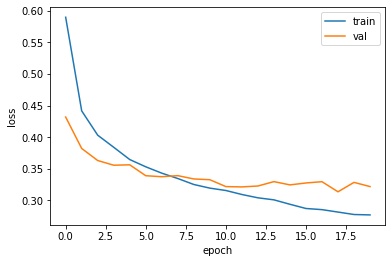

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5706 - accuracy: 0.7992 - val_loss: 0.4306 - val_accuracy: 0.8413
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4218 - accuracy: 0.8462 - val_loss: 0.3888 - val_accuracy: 0.8597
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3855 - accuracy: 0.8601 - val_loss: 0.3599 - val_accuracy: 0.8711
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3660 - accuracy: 0.8662 - val_loss: 0.3510 - val_accuracy: 0.8710
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3462 - accuracy: 0.8724 - val_loss: 0.3552 - val_accuracy: 0.8688
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3315 - accuracy: 0.8780 - val_loss: 0.3343 - val_accuracy: 0.8770
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3226 - accuracy: 0.8793 - val_loss: 0.3196 - val_accuracy:

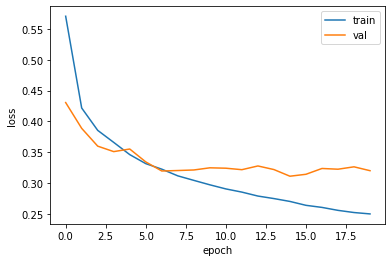

In [31]:
model = model_fn(keras.layers.Dropout(0.2))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- Drop Out 0.2보다 0.3이 성능이 더 좋음
- 0.3에서 epoch =10이 과대적합 되지않고 손실이 가장 낮음

## 모델 저장과 복원

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [33]:
# 훈련된 파리미터 저장
model.save_weights('model-weights.h5')

In [34]:
# 모델구조와 파라미터 저장
model.save('model-whole.h5')

In [35]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jun  7 07:36 model-weights.h5
-rw-r--r-- 1 root root 982664 Jun  7 07:36 model-whole.h5


In [36]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [37]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8819166666666667


In [38]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8819


[0.3354865312576294, 0.8819166421890259]

## 콜백
- 최상의 검증 점수를 만드는 모델을 저장

In [40]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=1, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5909 - accuracy: 0.7931 - val_loss: 0.4260 - val_accuracy: 0.8434
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4356 - accuracy: 0.8443 - val_loss: 0.3880 - val_accuracy: 0.8586
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4042 - accuracy: 0.8528 - val_loss: 0.3770 - val_accuracy: 0.8613
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3827 - accuracy: 0.8613 - val_loss: 0.3536 - val_accuracy: 0.8731
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3658 - accuracy: 0.8659 - val_loss: 0.3523 - val_accuracy: 0.8683
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3517 - accuracy: 0.8698 - val_loss: 0.3328 - val_accuracy: 0.8802
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3435 - accuracy: 0.8743 - val_loss: 0.3463 - val_accuracy:

In [41]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8871


[0.3179174065589905, 0.8870833516120911]

In [42]:
# EarlyStopping -> 조기종료 
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [43]:
# 10번째 epoch에서 훈련 중지 -> patience=1 이므로 8번째가 최상의 epoch
print(early_stopping_cb.stopped_epoch)

9


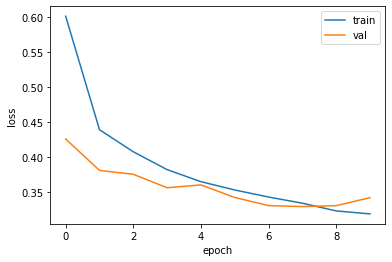

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [45]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8832


[0.3291053771972656, 0.8831666707992554]